In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from dython.nominal import associations
test = pd.read_excel("BANCO_LIMPO_INT.xlsx")
numeric_var = ['age', 'height', 'weight', 'bmi', 'income', 'score_food_smile', "score_subs_smile", "score_PA_smile", "score_stress_smile", "score_social_smile", "score_sleep_smile", "score_envir_smile", "scoretot_smile"]
categorical_var = ["university", "sex", "gender_identity", "sexual_orientation", "ethnic_group", 'marital_status', 'student_accommodation', "work", 'RENDA_categorias', 'student_of', 'sedentary_behavior', "sedentary_2", "phq9", "phq9_severity", "gad7", "gad7_severity"]
df_num = pd.DataFrame(test[numeric_var])
df_cat = pd.DataFrame(test[categorical_var])
corr_matrix_num_pearson = test[numeric_var].corr(method = 'pearson')
corr_matrix_num_kendall= test[numeric_var].corr(method = 'kendall')
corr_matrix_num_spearman= test[numeric_var].corr(method = 'spearman')


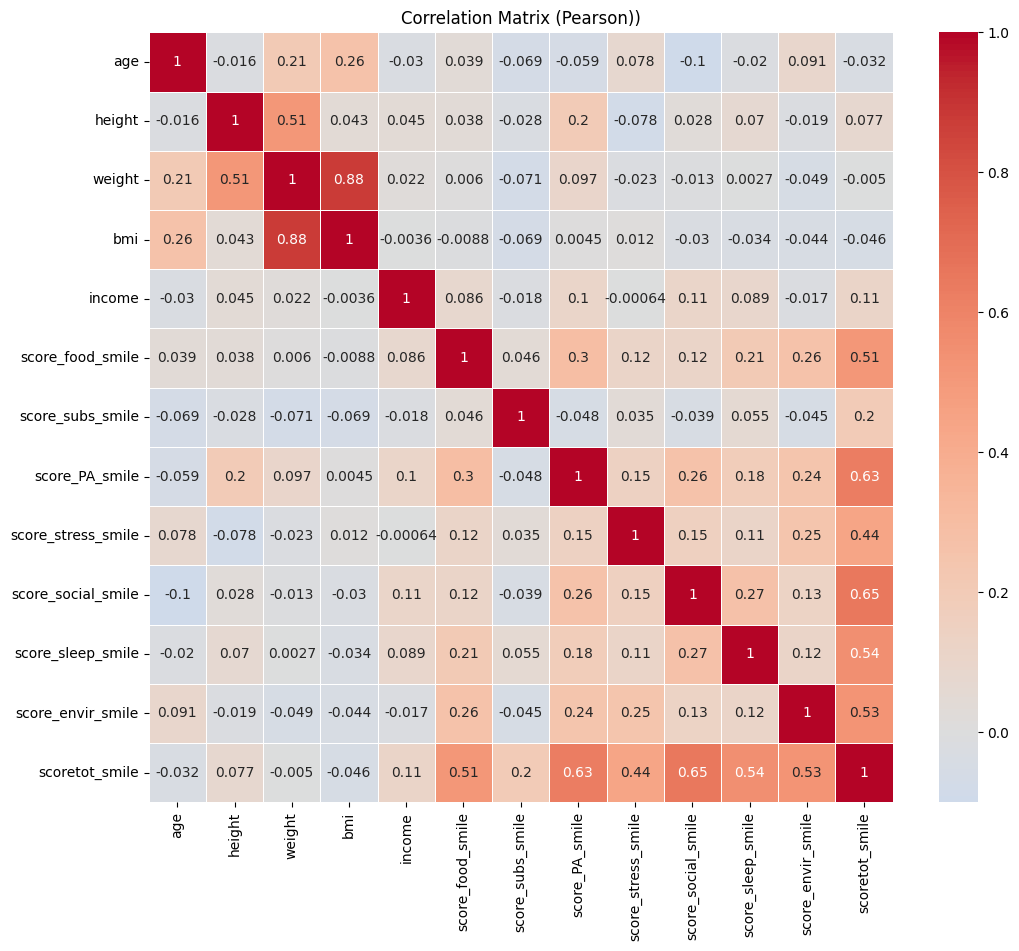

In [2]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_num_pearson, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix (Pearson))')
plt.show()

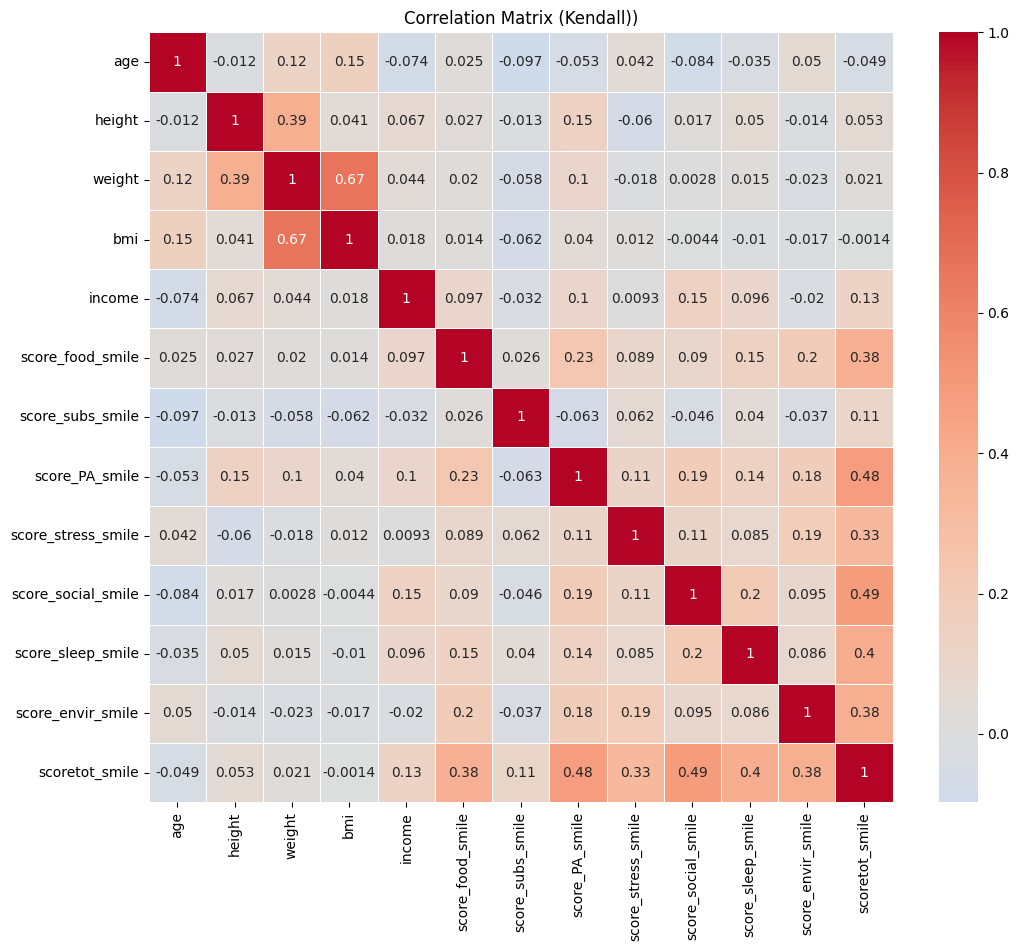

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_num_kendall, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix (Kendall))')
plt.show()

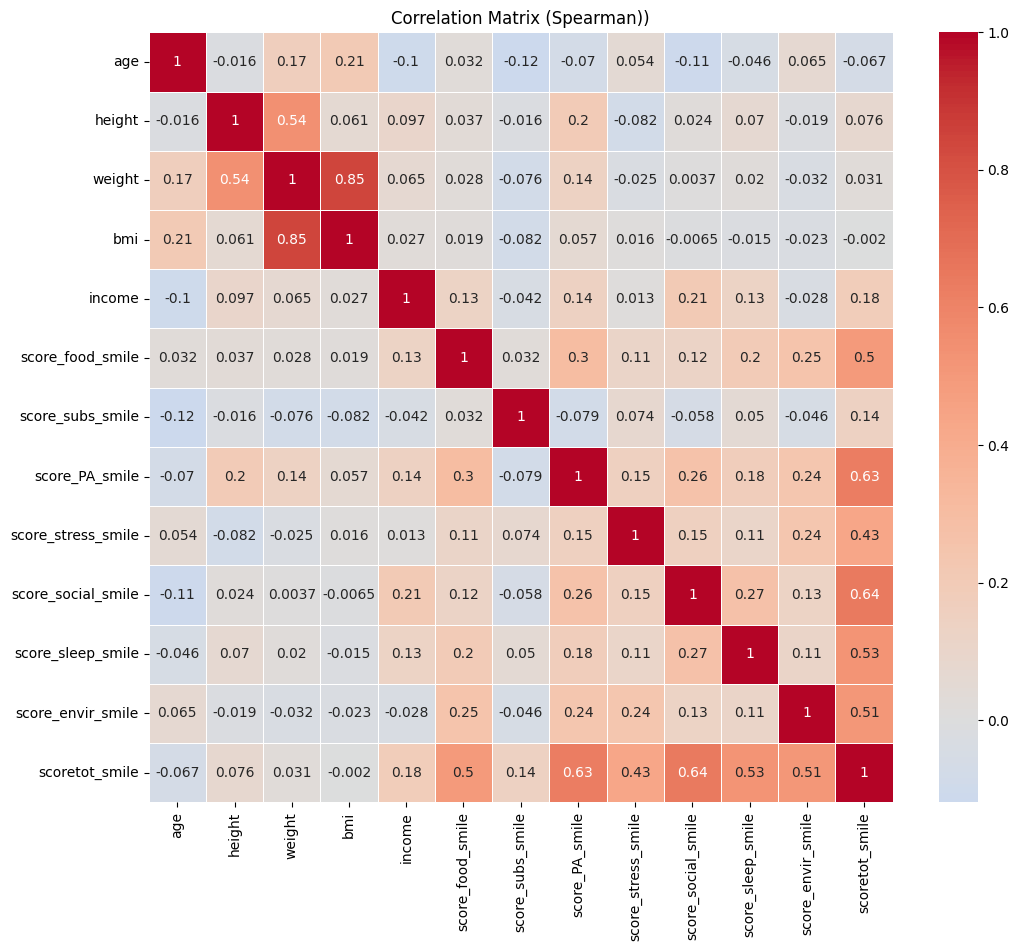

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_num_spearman, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix (Spearman))')
plt.show()

CATEGORICAL VARIABLES; METHOD - CHI-SQUARED TEST

In [ ]:
associations(df_cat, nominal_columns = 'all', plot = True)

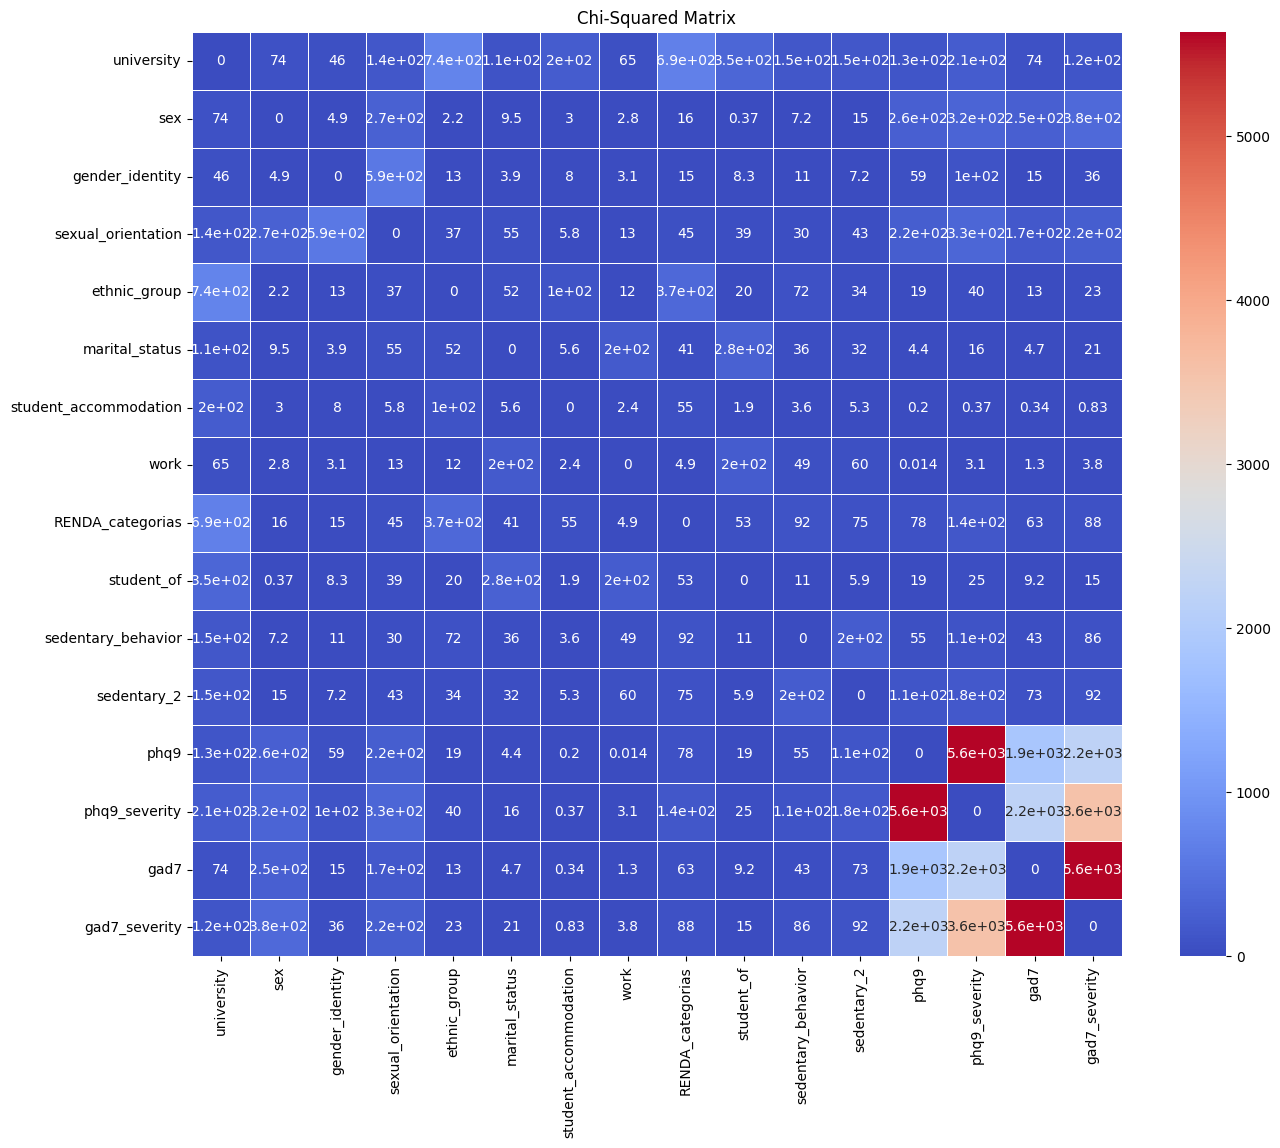

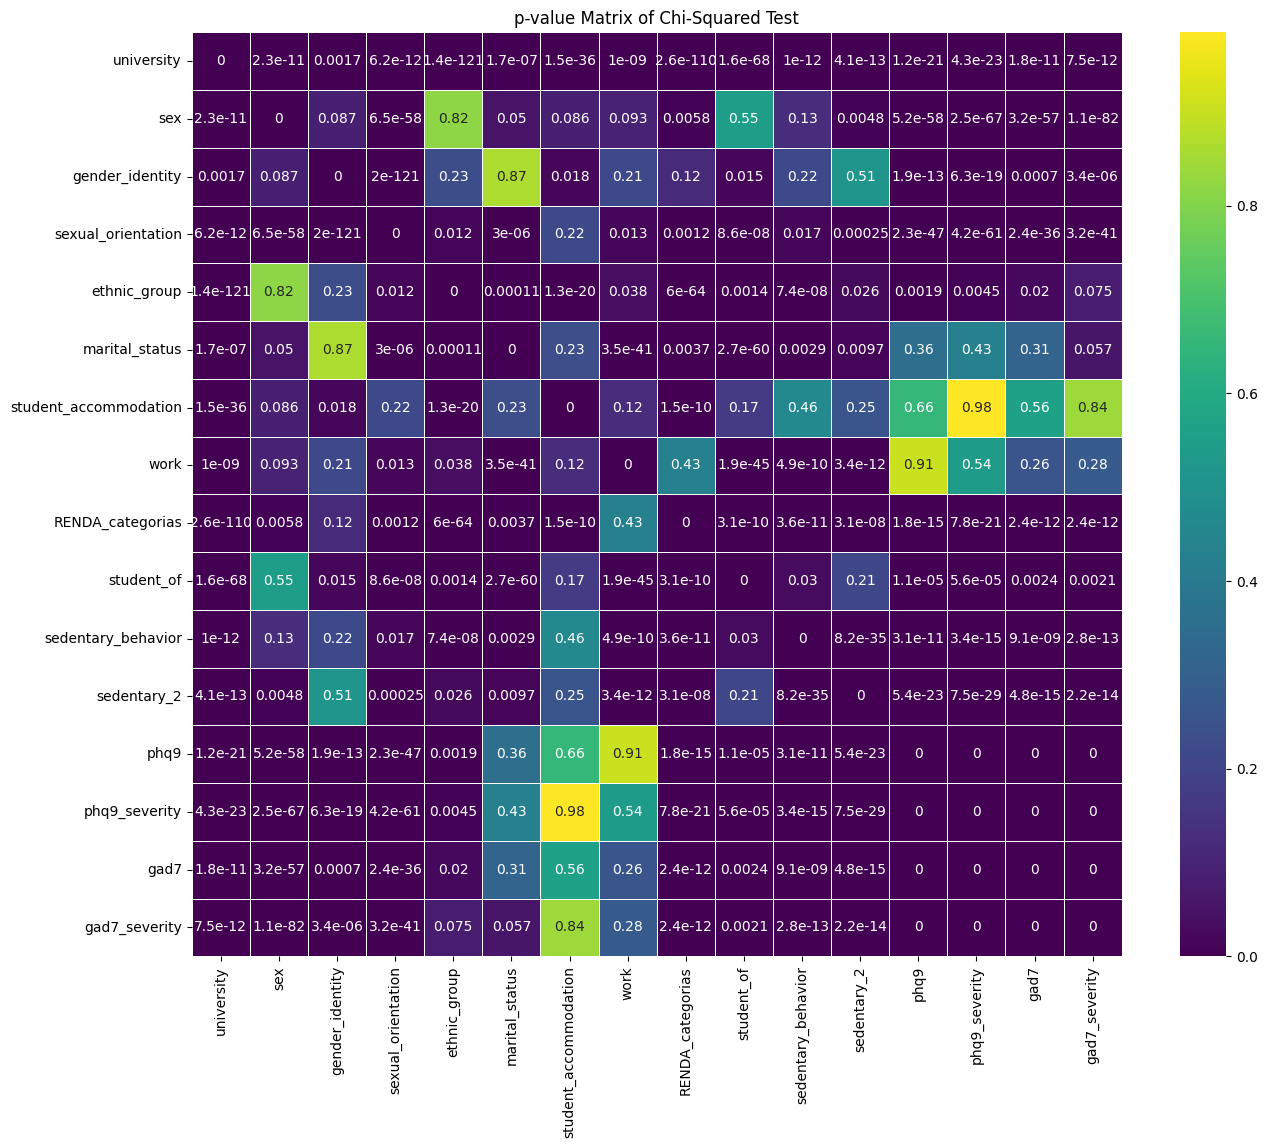

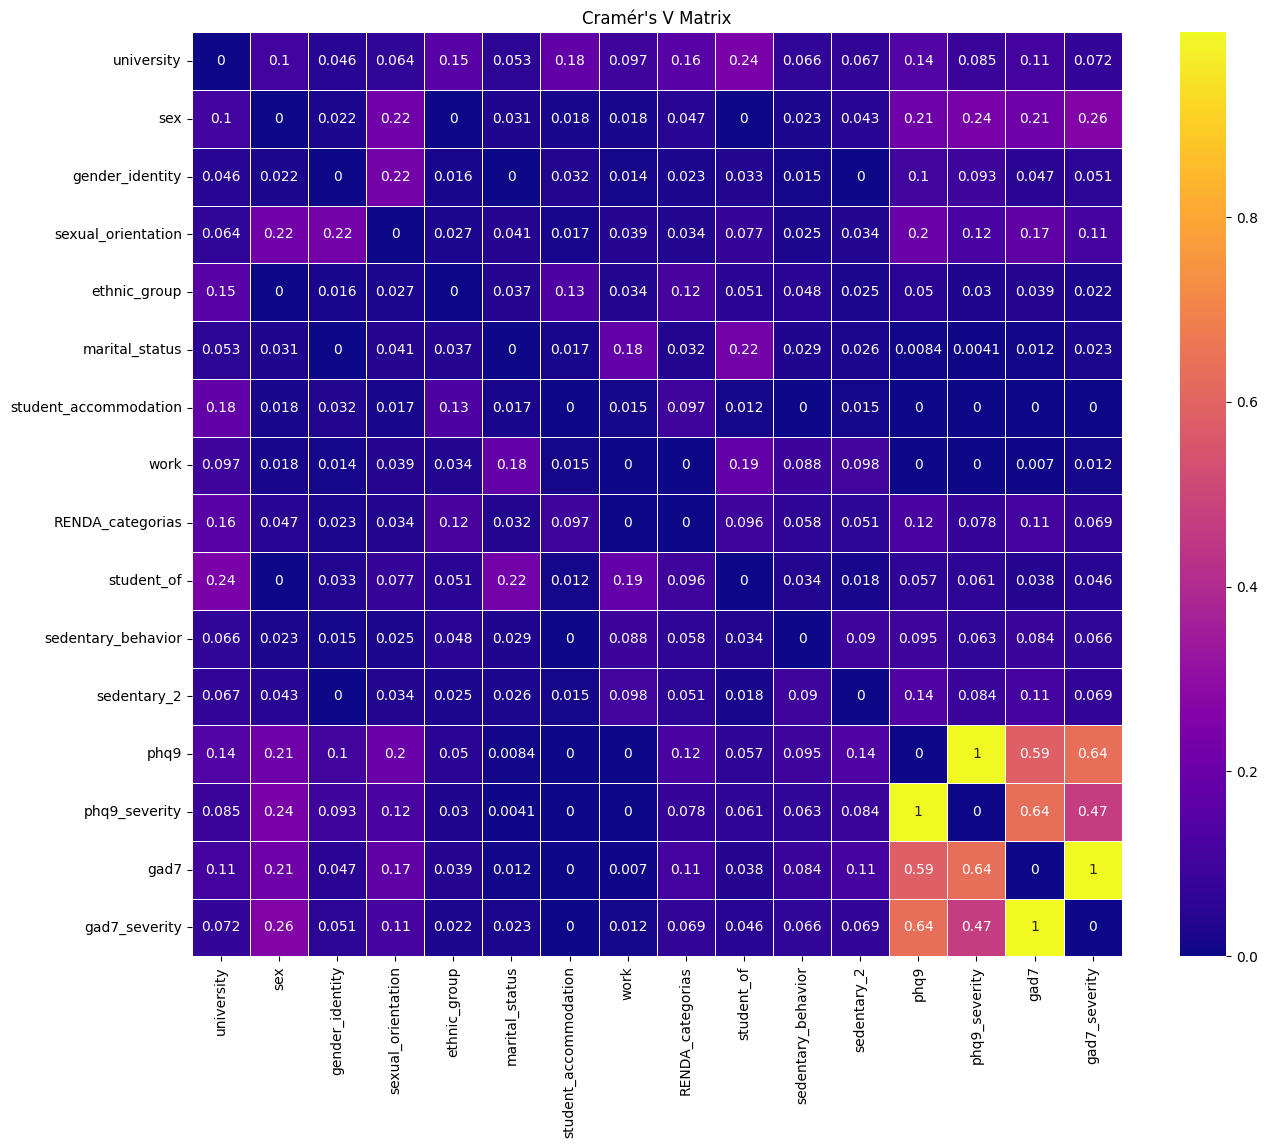

In [5]:
chi_squared_matrix = pd.DataFrame(index=categorical_var, columns=categorical_var)
p_value_matrix = pd.DataFrame(index=categorical_var, columns=categorical_var)
cramers_v_matrix = pd.DataFrame(index=categorical_var, columns=categorical_var)

def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))    
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

for col1 in categorical_var:
    for col2 in categorical_var:
        if col1 != col2:
            contingency_table = pd.crosstab(df_cat[col1], df_cat[col2])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            chi_squared_matrix.loc[col1, col2] = chi2
            p_value_matrix.loc[col1, col2] = p
            cramers_v_matrix.loc[col1, col2] = cramers_corrected_stat(contingency_table)
        else:
            chi_squared_matrix.loc[col1, col2] = np.nan
            p_value_matrix.loc[col1, col2] = np.nan 
            cramers_v_matrix.loc[col1, col2] = np.nan 
            

chi_squared_matrix = chi_squared_matrix.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
p_value_matrix = p_value_matrix.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

plt.figure(figsize=(15, 12))
sns.heatmap(chi_squared_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Chi-Squared Matrix')
plt.savefig('chi_squared_matrix.png', dpi=300)
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(p_value_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='white')
plt.title('p-value Matrix of Chi-Squared Test')
plt.savefig('p_value_matrix.png', dpi=300)
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(cramers_v_matrix, annot=True, cmap='plasma', linewidths=0.5, linecolor='white')
plt.title("Cramér's V Matrix")
plt.savefig('cramers_v_matrix.png', dpi=300)
plt.show()



In [ ]:
for col in df_cat:
    if df_cat[col].nunique() < len(df_cat) / 2:  
        df_cat[col] = df_cat[col].astype('category')

categorical_var = df_cat.select_dtypes(include=['category']).columns
numeric_var = df_num.select_dtypes(include=['float', 'int']).columns.difference(categorical_var)
anova_matrix = pd.DataFrame(index = categorical_var, columns= numeric_var)
for cat_col in categorical_var:
    for num_col in numeric_var:
        groups = [df_cat[num_col][df_cat[cat_col] == category] for category in df_cat[cat_col].cat.categories]
        if len(groups) > 1:
            f_stat, p_value = stats.f_oneway(*groups)
            anova_matrix.loc[cat_col, num_col] = f_stat
        else:
            anova_matrix.loc[cat_col, num_col] = np.nan
anova_matrix = anova_matrix.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

plt.figure(figsize=(15, 12))
sns.heatmap(anova_matrix, annot=True, cmap='plasma', linewidths=0.5, linecolor='white')
plt.title("ANOVA Matrix")
plt.savefig('anova_matrix.png', dpi=300)
plt.show()

In [ ]:
categorical_var_binary = ['sex', 'student_accommodation', 'work', 'student_of', 'phq9', 'gad7']
df = pd.DataFrame(index = test[categorical_var_binary], columns = test[numeric_var])
corr_matrix_num_pbs = pd.DataFrame(index=numeric_var , columns=categorical_var_binary )
for col1 in numeric_var:
    for col2 in categorical_var_binary:
        corr_matrix_num_pbs.loc[col1, col2] = stats.pointbiserialr(df[col2], df[col1])[0]

correlation_matrix = corr_matrix_num_pbs.dropna(how='all', axis=1).dropna(how='all', axis=0)
correlation_matrix = corr_matrix_num_pbs.astype(float)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlação Point-Biserial')
plt.show()
